> *** Task: Please implement the conversion with and without numpy by using lists only.
Conversion of degree centigrade to degree fahrenheit, using this formula:
$$ \vartheta(°F) = \vartheta(°C) \cdot 9/5 + 32$$
C = [20.1, 20.8, 21.9, 22.5, 22.7, 22.3, 21.8, 21.2, 20.9, 20.1]

In [29]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import scale

In [7]:
'''numpy conversion'''
C = [20.1, 20.8, 21.9, 22.5, 22.7, 22.3, 21.8, 21.2, 20.9, 20.1]
F = np.array(C) * (9/5) + 32
print (F)

[68.18 69.44 71.42 72.5  72.86 72.14 71.24 70.16 69.62 68.18]


In [13]:
'''list conversion'''
for i in C:
    F_l = i * (9/5) + 32
    print (f'{F_l:.2f}', end = ' ')

68.18 69.44 71.42 72.50 72.86 72.14 71.24 70.16 69.62 68.18 

> *** Task: Examine the following code snippets and explain them to your neighbor!

In [14]:
arr1 = [1, 2, 3, 4]
arr2 = [5, 6, 7, 8]

product = []
for i in range(len(arr1)):
    product.append(arr1[i] * arr2[i])
product

[5, 12, 21, 32]

> *** Task: Describe below what broadcasting does.

Answer: It multiply arrays elementwise

### Example: Normalizing a Dataset

Element-wise operations are useful for normalizing input data. Normalizing data is one of the techniques to speed-up the learning process when training a neural network. It consists of two steps:
* Subtract-out the mean $\mu$
* Normalize the variances $\sigma$

Let us have a look at a imaginary training set $X$ with two input features $\begin{bmatrix} x_1\\x_2\end{bmatrix}$.

In [15]:
m = 40 # number of training examples
np.random.seed(4)
x1 = np.random.uniform(low=1.0, high=5.0, size=m) # values of feature x1 are between 1 and 5
x2 = np.random.uniform(low=2.0, high=3.0, size=m) # values of feature x2 are between 2 and 3
X = np.array([x1, x2])

print (X)

[[4.86811936 3.188929   4.89073744 3.85926397 3.7909153  1.86435798
  4.90509782 1.02492102 2.01192945 2.73916613 4.11753169 1.7907403
  4.45197294 4.93360271 1.65536897 3.38933578 1.03594439 2.54628513
  1.17664023 4.82661187 2.74458659 4.79590923 4.14522394 4.46515719
  1.69266169 1.29979435 3.40297089 1.67188873 3.93352067 2.63377544
  3.11163529 4.75028634 3.08678449 1.43277353 1.63289363 3.18081061
  3.09761632 3.55044098 2.60598177 3.59922044]
 [2.3969     2.62391611 2.76740497 2.17897391 2.37557577 2.50253306
  2.68666708 2.25367965 2.55474086 2.62493084 2.89550117 2.36285359
  2.63755707 2.1914464  2.49779411 2.1824454  2.91838304 2.43182207
  2.8301881  2.4167763  2.90466759 2.40482522 2.3311745  2.57213877
  2.84544365 2.86101431 2.59568812 2.08466161 2.59726661 2.24545371
  2.73259345 2.89465129 2.51473397 2.60356351 2.06506781 2.54007473
  2.12918678 2.61456285 2.36365035 2.76775803]]


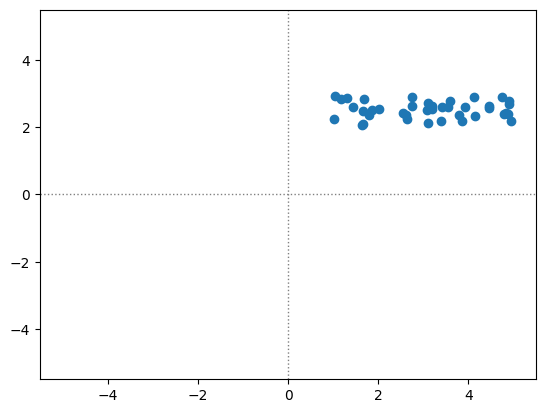

In [20]:
# A helper function for plotting the dataset as a scatter plot
def plotting_helper(X, scale):
    plt.ylim((-scale, scale)) # setting the range of the plotted y-axis
    plt.xlim((-scale, scale)) # setting the range of the plotted x-axis
    plt.axhline(0, color='gray', linewidth=1, linestyle='dotted') # plot the x-axis
    plt.axvline(0, color='gray', linewidth=1, linestyle='dotted') # plot the y-axis
    return plt.scatter(X[0], X[1])

#### Graphical representation of the data in X
plotting_helper(X, 5.5)

The mean can be calculated as: $$\mu = \frac{1}{m} {\sum_{i=1}^{m}x}$$
and then subtracted out of each element of the corresponding feature:
$$x := x - \mu$$

[1.33226763e-16 3.33066907e-17]


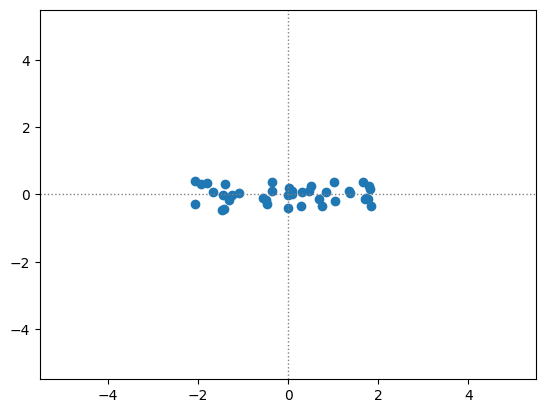

In [33]:
mu_x1 = np.sum(x1) / m # calculate the mean of the x1 feature
mu_x2 = np.sum(x2) / m # calculate the mean of the x2 feature

np.testing.assert_allclose(mu_x1, np.mean(x1), rtol=1e-5, atol=0)
np.testing.assert_allclose(mu_x2, np.mean(x2), rtol=1e-5, atol=0)

x1_new = x1 - mu_x1
x2_new = x2 - mu_x2
X_new = np.array([x1_new, x2_new])

#### Graphical representation of the data in X after subtracting the mean
plotting_helper(X_new, 5.5)
print(X_new.mean(axis=1))

Our training set has now (almost) zero-mean over both features.

The next step is to normalize the variances. It is obvious that the feature $x_1$ has much larger variance than the feature $x_2$. In order to do so:

For our distribution with zero-mean, the variance can be calculated as: $$\sigma^{2} = \frac{1}{m} {\sum_{i=1}^{m}x^{2}}$$
and then each element of the features should be divided by the corresponding variance :
$$x := \frac{x}{\sigma}$$

[1. 1.]


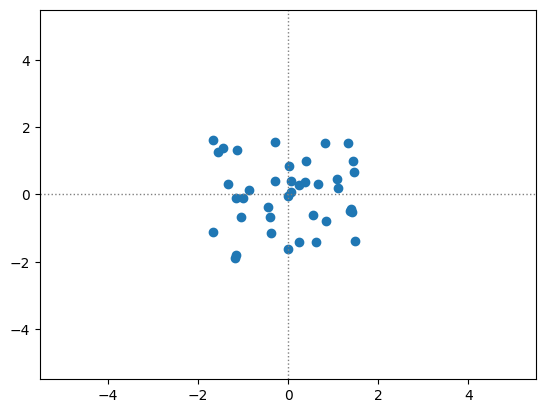

In [32]:
sigma_x1 = np.sum(np.square(x1_new)) / m # calculate the mean of the x1 feature
sigma_x2 = np.sum(np.square(x2_new)) / m # calculate the mean of the x2 feature

np.testing.assert_allclose(sigma_x1, np.var(x1_new), rtol=1e-5, atol=0)
np.testing.assert_allclose(sigma_x2, np.var(x2_new), rtol=1e-5, atol=0)

x1_norm = x1_new / np.sqrt(sigma_x1)
x2_norm = x2_new / np.sqrt(sigma_x2)
X_norm = np.array([x1_norm, x2_norm])

plotting_helper(X_norm, 5.5)
print(X_norm.std(axis=1))

The variances of both $x_1$ and $x_2$ are now equal to 1.

#### Another way to calculate the norm is by employing element-wise operations

[1. 1.]


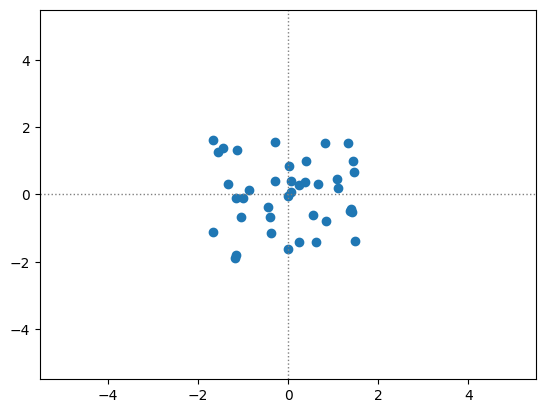

In [31]:
X_squared = np.square(X_new) # element-wise squaring of all elements of the dataset
sum_X = np.sum(X_squared, axis=1) # summing all elements per row
sigmas_X = np.divide(sum_X , m) # dividing the sums by m
sigmas_X = np.expand_dims(sigmas_X, axis=1) # reshaping the result with aditional axis - from (2,) to  (2, 1)

X_norm_easy = np.divide(X_new, np.sqrt(sigmas_X)) # perform the element-wise division

plotting_helper(X_norm_easy, 5.5)
print(X_norm_easy.std(axis=1))

The variances of both $x_1$ and $x_2$ are again equal to 1.

#### Machine learning tools:
`sklearn` provide normalizing functions that let you apply various normalizations.

[1. 1.]


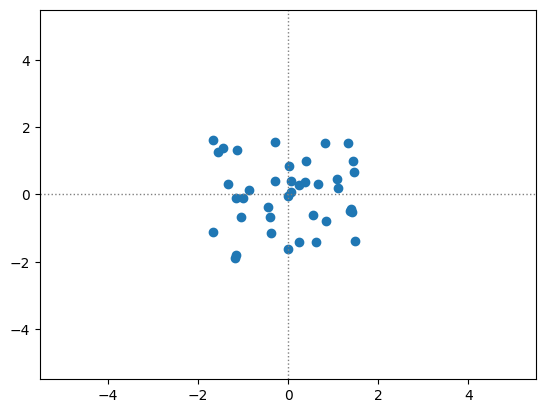

In [30]:
normed_matrix = scale(X, axis=1)
plotting_helper(normed_matrix, 5.5)
print(normed_matrix.std(axis=1)) # the sum of the normalized features should be 1.

<font color='white'>
**Important notice**:
- keep track of the dimensions of the data structures in NumPy when calculating matrix and dot product.
- in order to perform elementwise operations, the sizes of the NumPy arrays must be identical.